In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from random_matrix import generate_matrix, print_matrix

In [2]:
'''
This function is literally the same with the one in the base code
but cleaner and no comment the main purpose is for testing
'''
def find_least_cost(cost_matrix):
    worker_length = len(cost_matrix)
    lower_bound = float('inf') 
    assignment_result = []

    iteration = 0
    combination = 0

    unpruned_nodes = [(0, [], list(range(worker_length)))] 
    
    while unpruned_nodes:
        cost, assignment, unassigned = unpruned_nodes.pop() 
        iteration += 1

        if not unassigned: 
            combination += 1 
            if cost < lower_bound:
                lower_bound = cost 
                assignment_result = assignment 
            continue

        for job in unassigned:
            new_assignment = assignment + [job] 
            new_unassigned = [j for j in unassigned if j != job] 
            new_cost = calculate_cost(cost_matrix, new_assignment)

            if new_cost < lower_bound:
                unpruned_nodes.append((new_cost, new_assignment, new_unassigned))  

    # print(f"{iteration} Iterations though {combination} combinations") # For debugging
    return lower_bound, assignment_result

def calculate_cost(matrix, assignment):
    cost = 0
    for worker, job in enumerate(assignment):
        cost += matrix[worker][job]
    return cost

In [3]:
# dummy input
# output should be
# worker 0 -> job 1
# worker 1 -> job 0
# worker 2 -> job 2
# worker 3 -> job 3
# optimal cost = 13
input_data = np.array([
#job 0, 1, 2, 3 
    [9, 2, 7, 8], # Worker 0
    [6, 4, 3, 7], # Worker 1
    [5, 8, 1, 8], # Worker 2
    [7, 6, 9, 4]  # Worker 3
])
start = time.time()
solution, assignment = find_least_cost(input_data)
end = time.time()
print("Optimal Solution:", solution)
print("Optimal Assignment:", assignment)
print("Time Took :", end-start, "s")

34 Iterations though 6 combinations
Optimal Solution: 13
Optimal Assignment: [1, 0, 2, 3]
Time Took : 0.0010879039764404297 s


In [8]:
def test_bnb(size_input, dbg):
    execution_times = []
    for size in size_input:
        print(f"Input size : {size}")
        data = generate_matrix(size)
        start = time.time()
        solution, assignment = find_least_cost(data)
        end = time.time()
        execution_time = end - start
        
        if dbg:
            print_matrix(data)
            print("Optimal Solution:", solution)
            print("Optimal Assignment:", assignment)    
        print("Time Took :", f"{execution_time:.6f}s\n")
        execution_times.append(execution_time)
    return execution_times

In [9]:
input_size = [size for size in range(1, 19)]
execution_times = test_bnb(input_size, False)
print(execution_times)

Input size : 1
2 Iterations though 1 combinations
Time Took : 0.000000s

Input size : 2
4 Iterations though 1 combinations
Time Took : 0.000000s

Input size : 3
7 Iterations though 1 combinations
Time Took : 0.000000s

Input size : 4
30 Iterations though 4 combinations
Time Took : 0.001007s

Input size : 5
62 Iterations though 4 combinations
Time Took : 0.000000s

Input size : 6
259 Iterations though 7 combinations
Time Took : 0.000000s

Input size : 7
339 Iterations though 8 combinations
Time Took : 0.001405s

Input size : 8
1962 Iterations though 13 combinations
Time Took : 0.004990s

Input size : 9
2286 Iterations though 13 combinations
Time Took : 0.007525s

Input size : 10
15606 Iterations though 26 combinations
Time Took : 0.050068s

Input size : 11
62572 Iterations though 25 combinations
Time Took : 0.255025s

Input size : 12
93123 Iterations though 44 combinations
Time Took : 0.398916s

Input size : 13
76142 Iterations though 27 combinations
Time Took : 0.399394s

Input size : 

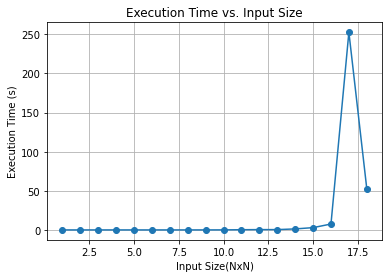

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(input_size, execution_times, marker='o')
plt.title("Execution Time vs. Input Size")
plt.xlabel("Input Size(NxN)")
plt.ylabel("Execution Time (s)")
plt.grid(True)
plt.show()